In [34]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
import folium
import plotly.express as px 
# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': 'lavender'}, style='darkgrid')

In [35]:
df = pd.read_csv('C:/Users/stavr/Documents/BigBlueDataAcademy_DSBPT/Booking_cancelation/Data/hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [36]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [37]:
# checking for null values 

null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
hotel,0,0.000000
is_canceled,0,0.000000
lead_time,0,0.000000
arrival_date_year,0,0.000000
arrival_date_month,0,0.000000
arrival_date_week_number,0,0.000000
arrival_date_day_of_month,0,0.000000
stays_in_weekend_nights,0,0.000000
stays_in_week_nights,0,0.000000
adults,0,0.000000


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [39]:
df[df['adults']>4].count()



hotel                             16
is_canceled                       16
lead_time                         16
arrival_date_year                 16
arrival_date_month                16
arrival_date_week_number          16
arrival_date_day_of_month         16
stays_in_weekend_nights           16
stays_in_week_nights              16
adults                            16
children                          16
babies                            16
meal                              16
country                           16
market_segment                    16
distribution_channel              16
is_repeated_guest                 16
previous_cancellations            16
previous_bookings_not_canceled    16
reserved_room_type                16
assigned_room_type                16
booking_changes                   16
deposit_type                      16
agent                              5
company                            0
days_in_waiting_list              16
customer_type                     16
a

In [40]:
# # Numerical Variables:
# lead_time: The average time between booking and arrival is approximately 104 days, ranging from 0 to 737 days.
# arrival_date_week_number: The average week number of the year for arrival is approximately 27.17, ranging from 1 to 53.
# arrival_date_day_of_month: The average day of the month of arrival is approximately 15.80, ranging from 1 to 31.
# stays_in_weekend_nights: On average, guests stay for around 0.93 weekend nights, with some guests staying for as long as 19 weekend nights.
# stays_in_week_nights: On average, guests stay for about 2.5 week nights, with stays ranging from 0 to 50 week nights.
# adults: The average number of adults per booking is approximately 1.86, with a range from 0 to 55 adults.
# children: On average, there are about 0.1 children per booking, with a maximum of 10 children in some bookings.
# babies: The average number of babies per booking is very low, approximately 0.008, with a maximum of 10 babies in some bookings.
# previous_cancellations: On average, guests have canceled about 0.09 times in the past, with some guests having as many as 26 previous cancellations.
# previous_boo|kings_not_canceled: On average, guests have not canceled about 0.14 bookings in the past, with some guests having as many as 72 previous bookings that they didn't cancel.
# booking_changes: Bookings are changed on average about 0.22 times, with some bookings being changed up to 21 times.
# days_in_waiting_list: The average time a booking spends on the waiting list is approximately 2.32 days, with some bookings waiting for as long as 391 days.
# adr: The Average Daily Rate is about 101.83, with rates ranging from -6.38 (which might indicate errors or special cases) to 5400.
# required_car_parking_spaces: On average, guests require about 0.06 parking spaces, with some bookings requiring up to 8 spaces.
# total_of_special_requests: On average, guests make about 0.57 special requests, with some making up to 5 requests.

In [41]:
df.describe(include='object').T

,count,unique,top,freq
hotel,119390,2,City Hotel,79330
arrival_date_month,119390,12,August,13877
meal,119390,5,BB,92310
country,118902,177,PRT,48590
market_segment,119390,8,Online TA,56477
distribution_channel,119390,5,TA/TO,97870
reserved_room_type,119390,10,A,85994
assigned_room_type,119390,12,A,74053
deposit_type,119390,3,No Deposit,104641
customer_type,119390,4,Transient,89613


In [42]:
# Categorical Variables:
# hotel: There are two types of hotels, with "City Hotel" being the most frequent category, occurring 79,330 times out of 119,390 entries.
# is_canceled: Two unique values (0 for not canceled and 1 for canceled) are present. The most common value is "0" (not canceled), occurring 75,166 times.
# arrival_date_year: There are three unique years present, with 2016 being the most frequent year of arrival, observed 56,707 times.
# arrival_date_month: There are 12 unique months. August is the most frequent month of arrival, observed 13,877 times.
# meal: Five unique types of meals are booked. The most common type is "BB", observed 92,310 times.
# country: 178 unique countries of origin are present. The most frequent country is "PRT" (Portugal), observed 48,590 times.
# market_segment: Eight unique market segments are present. The most common segment is "Online TA", observed 56,477 times.
# distribution_channel: Five unique booking distribution channels are present, with "TA/TO" being the most frequent, observed 97,870 times.
# is_repeated_guest: Two unique values (0 for not repeated and 1 for repeated) are present. The most frequent value is "0" (not repeated), observed in the majority of entries.
# reserved_room_type and assigned_room_type: Various room types are present, with some types being more frequent than others.
# deposit_type: Three unique types of deposits are made. The most common type is "No Deposit", observed 104,641 times.
# agent: There are 334 unique agents, with '9.0' being the most frequent, occurring 31,961 times.
# company: There are 353 unique companies, but 'nan' (missing values) is the most frequent, occurring 112,593 times. This indicates that the 'company' variable has a high percentage of missing values.
# customer_type: Four unique customer types are present. The most frequent type is "Transient", observed 89,613 times.
# reservation_status: Three unique reservation statuses are present. The most common status is "Check-Out", observed 75,166 times.
# reservation_status_date: There are 926 unique values, with '2015-10-21' being the most frequent, occurring 1,461 times.
# name: There are 81,503 unique names, with 'Michael Johnson' being the most frequent, occurring 48 times.
# email: There are 115,889 unique email addresses, with 'Michael.C@gmail.com' being the most frequent, occurring 6 times.
# phone-number: There are 119,390 unique phone numbers, indicating that almost every guest has a unique phone number.
# credit_card: There are 9,000 unique credit card numbers, with '**4923' being the most frequent, occurring 28 times.

In [43]:
country_wise_guests = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
...,...,...
160,BHR,1
161,DJI,1
162,MLI,1
163,NPL,1


# EDA

In [44]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],
                           color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

In [56]:
df_is_canceled = df.loc[df['is_canceled'] == 1]
df_is_canceled

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
8,Resort Hotel,1,85,2015,NaN,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,NaN,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22
10,Resort Hotel,1,23,2015,NaN,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,123.0,0,0,Canceled,2015-06-23
27,Resort Hotel,1,60,2015,NaN,27,1,2,5,2,...,No Deposit,240.0,NaN,0,Transient,107.0,0,2,Canceled,2015-05-11
32,Resort Hotel,1,96,2015,NaN,27,1,2,8,2,...,No Deposit,NaN,NaN,0,Transient,108.3,0,2,Canceled,2015-05-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,City Hotel,1,132,2017,NaN,17,25,0,0,0,...,No Deposit,9.0,NaN,0,Transient,0.0,0,3,Canceled,2017-04-25
111355,City Hotel,1,4,2017,NaN,23,5,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-06-05
111924,City Hotel,1,7,2017,NaN,22,31,0,1,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,Canceled,2017-05-31
111925,City Hotel,1,6,2017,NaN,29,17,1,0,1,...,No Deposit,NaN,238.0,0,Transient,65.0,0,0,No-Show,2017-07-17


In [57]:
country_wise_canceled = df[df['is_canceled'] == 1]['country'].value_counts().reset_index()
country_wise_canceled.columns = ['country', 'No of guests']
country_wise_canceled

,country,No of guests
0,PRT,27519
1,GBR,2453
2,ESP,2177
3,FRA,1934
4,ITA,1333
...,...,...
122,UMI,1
123,HND,1
124,FJI,1
125,SYC,1


In [66]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_canceled, locations = country_wise_canceled['country'],
                           color = country_wise_canceled['No of guests'], hover_name = country_wise_canceled['country'])
guests_map.show()

In [60]:
df_country = df.groupby('country')['country'].count().reset_index(name='count')
df_country

,country,count
0,ABW,2
1,AGO,362
2,AIA,1
3,ALB,12
4,AND,7
...,...,...
172,VGB,1
173,VNM,8
174,ZAF,80
175,ZMB,2


In [65]:
df_merged_country = country_wise_canceled.merge(df_country,on='country',how='inner')
df_merged_country['perc'] = (df_merged_country['No of guests'] / df_merged_country['count']) * 100
df_merged_country = df_merged_country.sort_values('perc',ascending=False)
df_merged_country

,country,No of guests,count,perc
97,GLP,2,2,100.000000
124,FJI,1,1,100.000000
123,HND,1,1,100.000000
122,UMI,1,1,100.000000
115,VGB,1,1,100.000000
...,...,...,...,...
79,LTU,7,81,8.641975
80,NZL,6,74,8.108108
89,ISL,4,57,7.017544
126,CRI,1,19,5.263158


<AxesSubplot:>

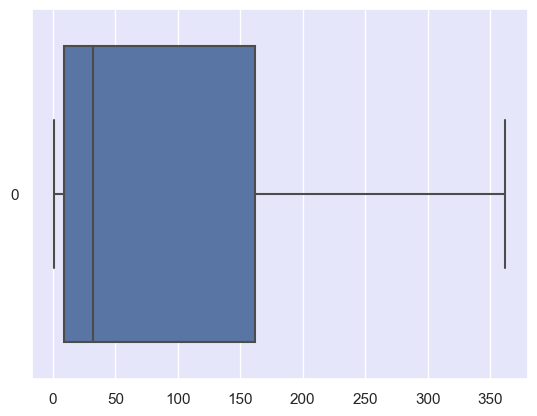

In [69]:
sns.boxplot(df_merged_country['count'],orient='h',showfliers=False)

In [71]:
df_merged_country = df_merged_country.loc[df_merged_country['count']<360]
df_merged_country

,country,No of guests,count,perc
97,GLP,2,2,100.000000
124,FJI,1,1,100.000000
123,HND,1,1,100.000000
122,UMI,1,1,100.000000
115,VGB,1,1,100.000000
...,...,...,...,...
79,LTU,7,81,8.641975
80,NZL,6,74,8.108108
89,ISL,4,57,7.017544
126,CRI,1,19,5.263158


In [ ]:
sns.histplot(df_merged_county[''])

# People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe

In [45]:
#Most guests are from Portugal and other countries in Europe.

data = df[df['is_canceled'] == 0]
px.box(data_frame = data, x = 'reserved_room_type', y = 'adr', color = 'hotel', template = 'plotly_dark')

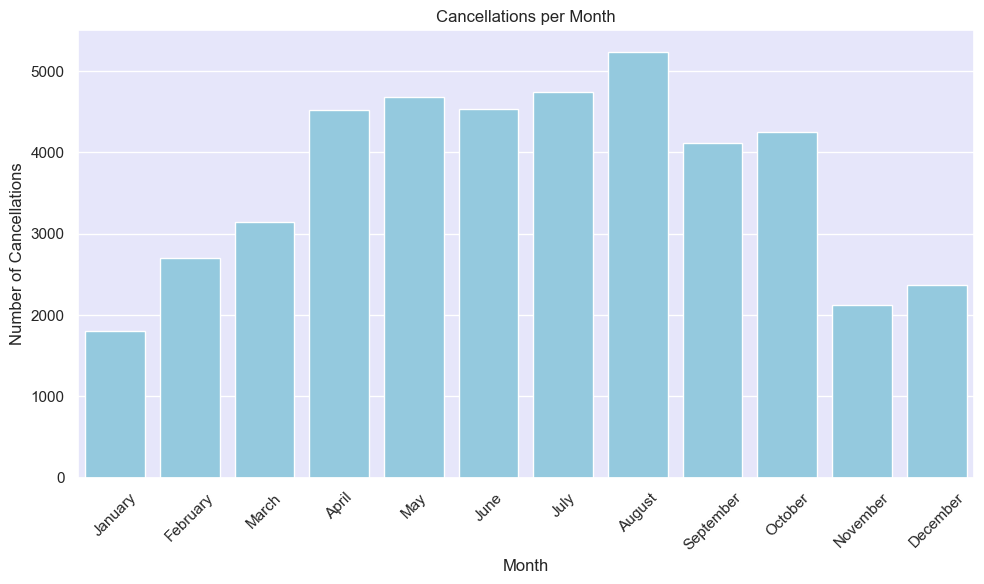

In [46]:
# Group by 'arrival_date_month' and count cancellations for each month
cancellations_per_month = df[df['is_canceled'] == 1].groupby('arrival_date_month')['is_canceled'].count().reset_index()

# Reorder the months for plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancellations_per_month['arrival_date_month'] = pd.Categorical(cancellations_per_month['arrival_date_month'], categories=months_order, ordered=True)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_date_month', y='is_canceled', data=cancellations_per_month, color='skyblue')
plt.title('Cancellations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

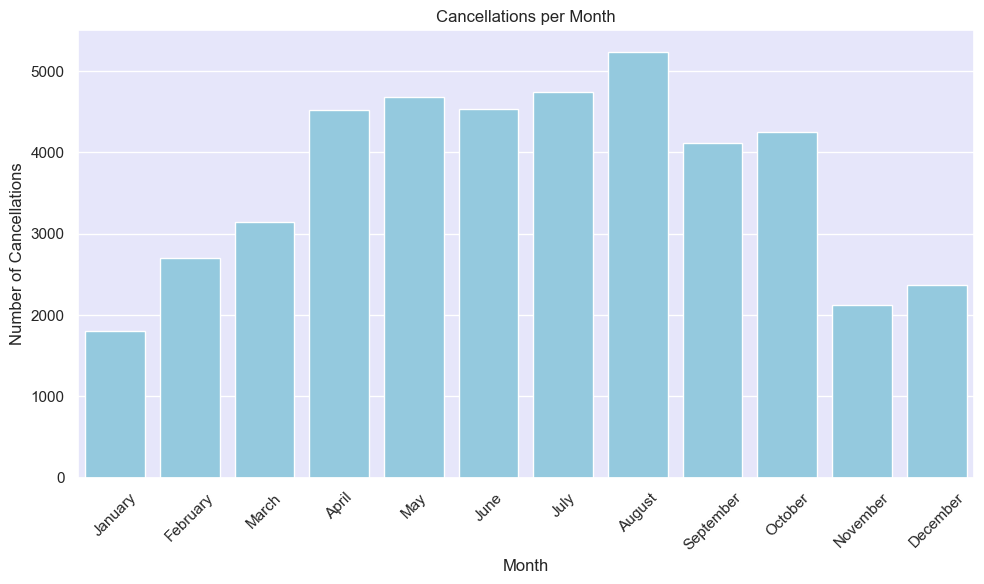

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the hotel bookings data
# If 'arrival_date_month' is in string format, you might want to convert it to categorical or datetime format first

# Group by 'arrival_date_month' and count cancellations for each month
cancellations_per_month = df[df['is_canceled'] == 1].groupby('arrival_date_month').size().reset_index(name='cancellations')

# Reorder the months for plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancellations_per_month['arrival_date_month'] = pd.Categorical(cancellations_per_month['arrival_date_month'], categories=months_order, ordered=True)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_date_month', y='cancellations', data=cancellations_per_month, color='skyblue')
plt.title('Cancellations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [78]:
df['month'] = df['reservation_status_date'].dt.month_name().str.slice(stop=3)
df['month']

0         Jul
1         Jul
2         Jul
3         Jul
4         Jul
         ... 
119385    Sep
119386    Sep
119387    Sep
119388    Sep
119389    Sep
Name: month, Length: 119390, dtype: object

In [75]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [80]:
df['arrival_date_month'].unique()

array([nan], dtype=object)

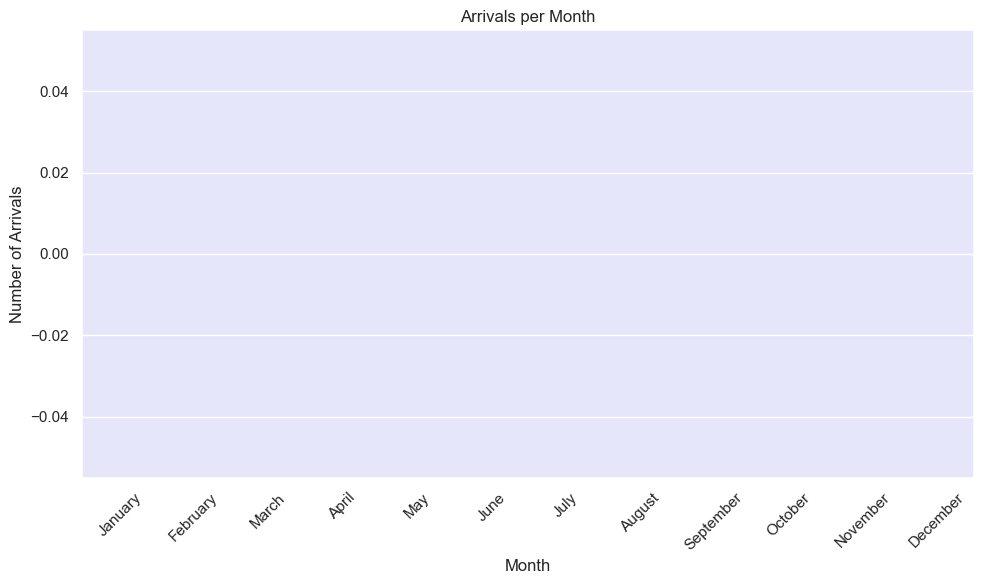

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the hotel bookings data
# If 'arrival_date_month' is in string format, you might want to convert it to categorical or datetime format first

# Group by 'arrival_date_month' and count cancellations for each month
arrival_per_month = df[df['is_canceled'] == 0].groupby('month').size().reset_index(name='cancellations')

# Reorder the months for plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
arrival_per_month['arrival_date_month'] = pd.Categorical(arrival_per_month['arrival_date_month'], categories=months_order, ordered=True)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_date_month', y='cancellations', data=arrival_per_month, color='skyblue')
plt.title('Arrivals per Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

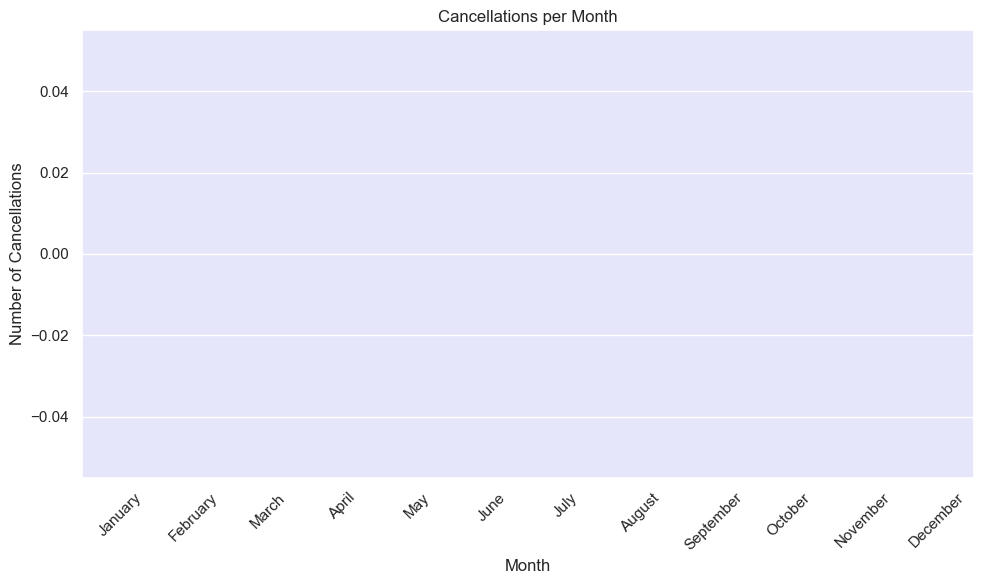

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the hotel bookings data

# Define a dictionary to map month numbers to month names
month_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Convert numerical month values to month names
df['arrival_date_month'] = df['arrival_date_month'].map(month_map)

# Group by 'arrival_date_month' and count cancellations for each month
cancellations_per_month = df[df['is_canceled'] == 1].groupby('arrival_date_month').size().reset_index(name='cancellations')

# Reorder the months for plotting
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cancellations_per_month['arrival_date_month'] = pd.Categorical(cancellations_per_month['arrival_date_month'], categories=months_order, ordered=True)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='arrival_date_month', y='cancellations', data=cancellations_per_month, color='skyblue')
plt.title('Cancellations per Month')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


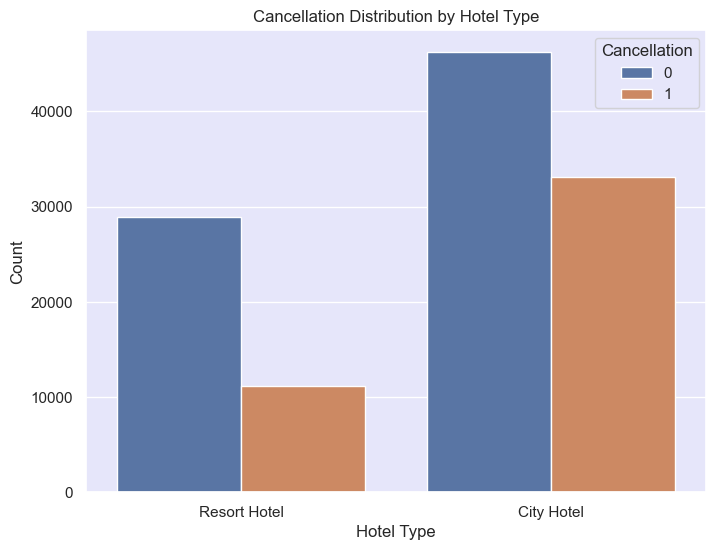

In [50]:
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df)
plt.title('Cancellation Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Cancellation')
plt.show()


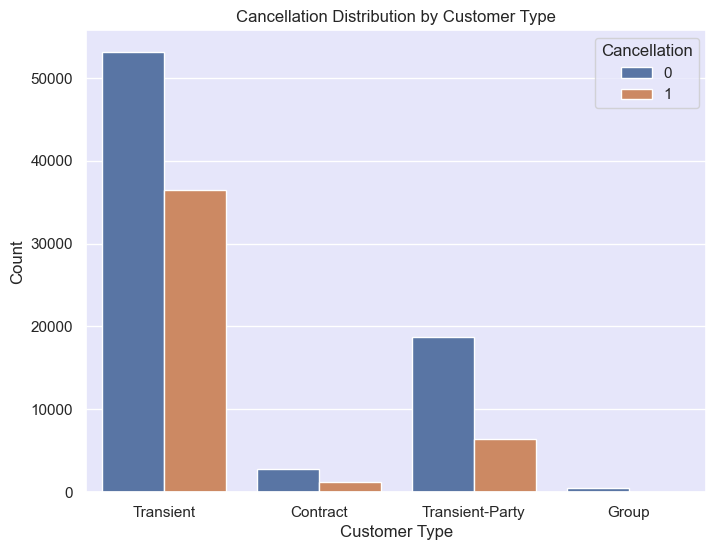

In [51]:
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=df)
plt.title('Cancellation Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Cancellation')
plt.show()


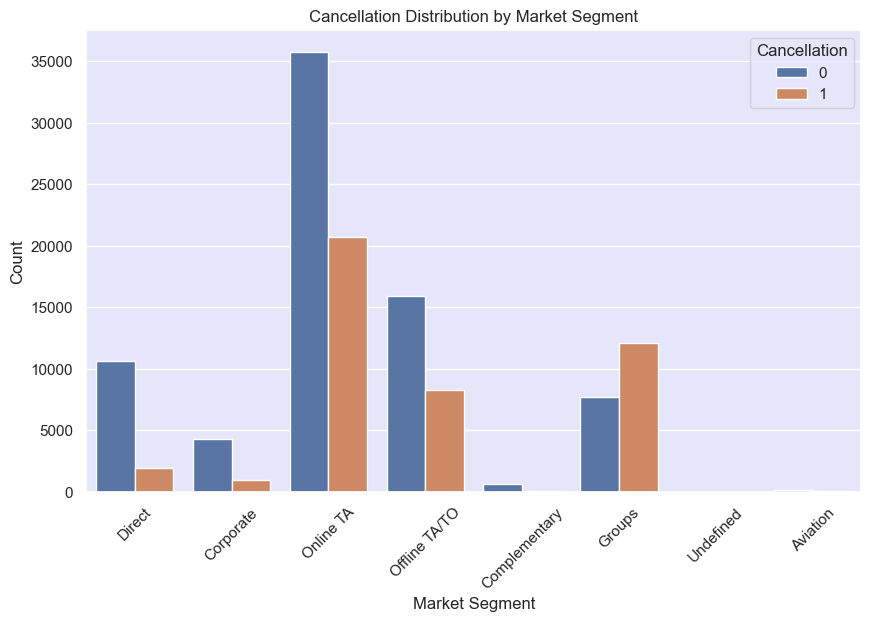

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.title('Cancellation Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Cancellation')
plt.show()


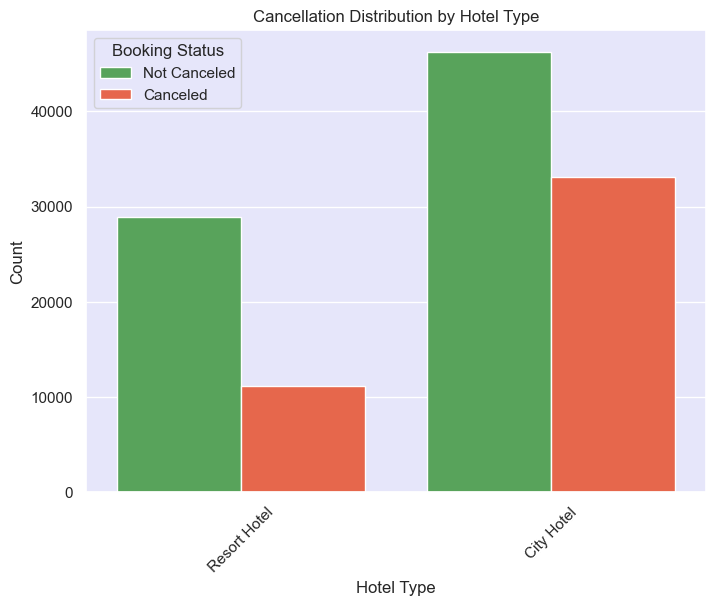

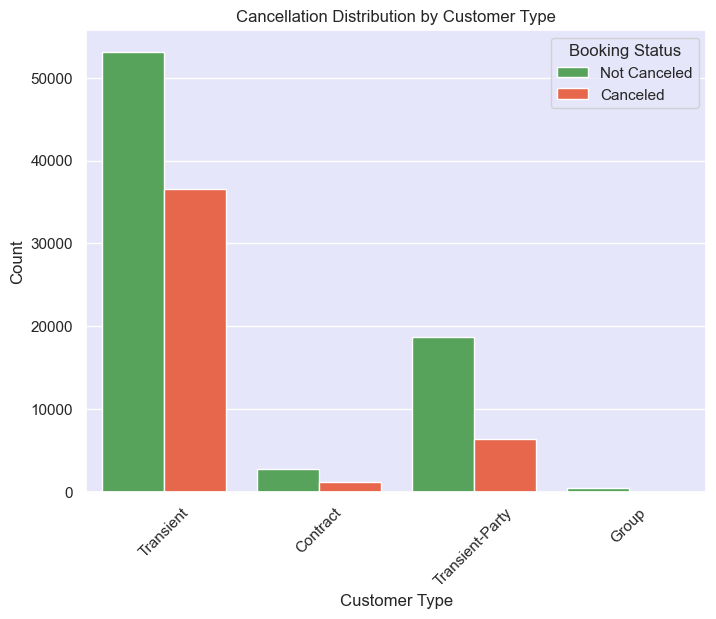

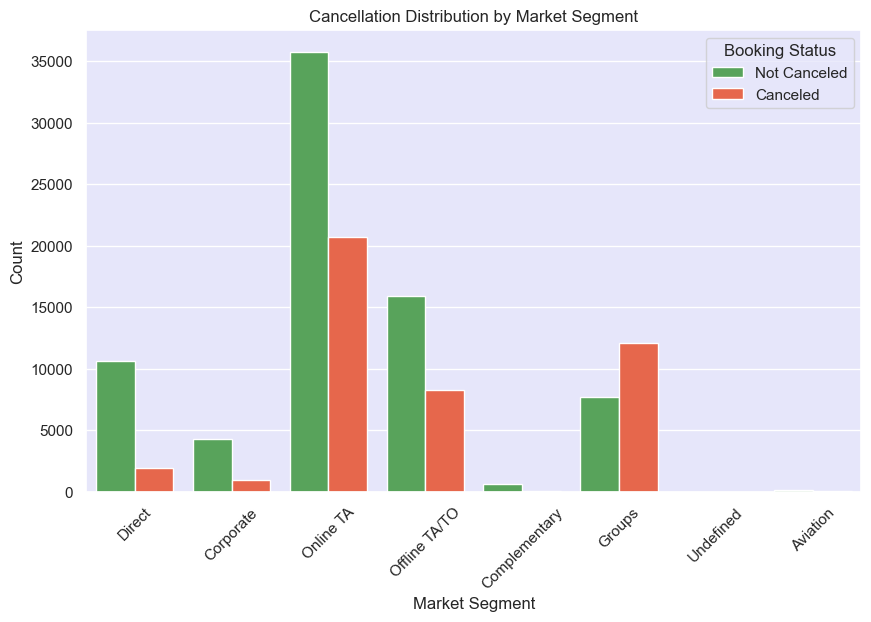

In [53]:
# Set a custom color palette
custom_palette = ['#4CAF50', '#FF5733']

# Plot 1: Cancellation Distribution by Hotel Type
plt.figure(figsize=(8, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df, palette=custom_palette)
plt.title('Cancellation Distribution by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()

# Plot 2: Cancellation Distribution by Customer Type
plt.figure(figsize=(8, 6))
sns.countplot(x='customer_type', hue='is_canceled', data=df, palette=custom_palette)
plt.title('Cancellation Distribution by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()

# Plot 3: Cancellation Distribution by Market Segment
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df, palette=custom_palette)
plt.title('Cancellation Distribution by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()


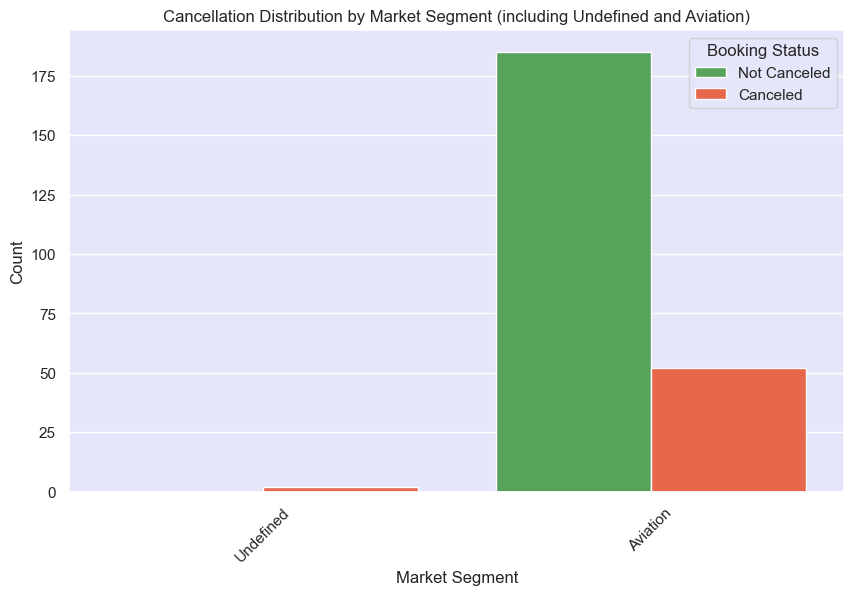

In [54]:
# Filter the DataFrame for undefined and aviation market segments
df_filtered = df[df['market_segment'].isin(['Undefined', 'Aviation'])]

# Plot: Cancellation Distribution by Market Segment (including Undefined and Aviation)
plt.figure(figsize=(10, 6))
sns.countplot(x='market_segment', hue='is_canceled', data=df_filtered, palette=custom_palette)
plt.title('Cancellation Distribution by Market Segment (including Undefined and Aviation)')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.show()
